# Task 2 

## Credit / Home Loans 

Standard Bank is embracing the digital transformation wave and intends to use new and exciting technologies to give their customers a complete set of services from the convenience of their mobile devices.
As Africa’s biggest lender by assets, the bank aims to improve the current process in which potential borrowers apply for a home loan. The current process involves loan officers having to manually process home loan applications. This process takes 2 to 3 days to process upon which the applicant will receive communication on whether or not they have been granted the loan for the requested amount.
To improve the process Standard Bank wants to make use of machine learning to assess the credit worthiness of an applicant by implementing a model that will predict if the potential borrower will default on his/her loan or not, and do this such that the applicant receives a response immediately after completing their application. 

You will be required to follow the data science lifecycle to fulfill the objective. The data science lifecycle (https://www.datascience-pm.com/crisp-dm-2/) includes:

- Business Understanding
- Data Understanding
- Data Preparation
- Modelling
- Evaluation
- Deployment.

You now know the CRoss Industry Standard Process for Data Mining (CRISP-DM), have an idea of the business needs and objectivess, and understand the data. Next is the tedious task of preparing the data for modeling, modeling and evaluating the model. Luckily, just like EDA the first of the two phases can be automated. But also, just like EDA this is not always best. 


In this task you will be get a taste of AutoML and Bespoke ML. In the notebook we make use of the library auto-sklearn/autosklearn (https://www.automl.org/automl/auto-sklearn/) for AutoML and sklearn for ML. We will use train one machine for the traditional approach and you will be required to change this model to any of the models that exist in sklearn. The model we will train will be a Logistic Regression. Parts of the data preparation will be omitted for you to do, but we will provide hints to lead you in the right direction.

The data provided can be found in the Resources folder as well as (https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset).

- train will serve as the historical dataset that the model will be trained on and,
- test will serve as unseen data we will predict on, i.e. new ('future') applicants.

### Part One


The Home Loans Department manager wants to know the following:

1. An overview of the data. (HINT: Provide the number of records, fields and their data types. Do for both).

2. What data quality issues exist in both train and test? (HINT: Comment any missing values and duplicates)

3. How do the the loan statuses compare? i.e. what is the distrubition of each?

4. How do women and men compare when it comes to defaulting on loans in the historical dataset?

5. How many of the loan applicants have dependents based on the historical dataset?

6. How do the incomes of those who are employed compare to those who are self employed based on the historical dataset? 

7. Are applicants with a credit history more likely to default than those who do not have one?

8. Is there a correlation between the applicant's income and the loan amount they applied for? 

### Part Two

Train your model










# Part One

## Overview of the data

In [1]:
#import all libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dt = pd.read_csv('train.csv')

In [3]:
#check the head of the train dataset

dt.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
dt2 = pd.read_csv('test.csv')

In [5]:
#check the head of the test dataset

dt2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


### put the two dataset together for easy analysis

In [6]:
df = df = pd.concat([dt, dt2], axis=0)

In [7]:
#check the head of the dataset

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
#check the tail of the train dataset

df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,NaN
363,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,NaN
364,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,NaN
365,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,NaN
366,LP002989,Male,No,0,Graduate,Yes,9200,0.0,98.0,180.0,1.0,Rural,NaN


In [9]:
#check the datatype of the dataset

df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [10]:
#check the information of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


In [11]:
#the summary statistics of the data

df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [12]:
#check the column of the dataset

df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [13]:
#the shape attribute 

df.shape

(981, 13)

## What data quality issues exist in both train and test? (HINT: Comment any missing values and duplicates)

In [14]:
#checking the missing data, from below we can see we dont have any missing data fpr both train and test

df.isna().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

### view the values in the categorical columns

In [15]:
df.Gender.unique()

array(['Male', 'Female', nan], dtype=object)

In [16]:
df.Married.unique()

array(['No', 'Yes', nan], dtype=object)

In [17]:
df.Self_Employed.unique()

array(['No', 'Yes', nan], dtype=object)

In [18]:
df.Loan_Status.unique()

array(['Y', 'N', nan], dtype=object)

In [19]:
## checking for duplication

df.duplicated().any()

False

## Univariables Analysis

In [20]:
###How do the the gender compare? i.e. what is the distrubition of each?
df['Gender'].value_counts()

Male      775
Female    182
Name: Gender, dtype: int64

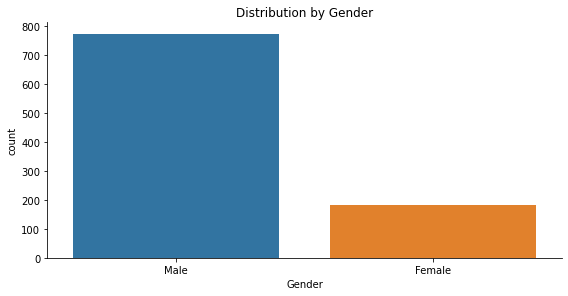

In [21]:
### Gender

sns.catplot(x = "Gender", kind="count", data = df,height=4, aspect=2,order = df['Gender'].value_counts(ascending=False).index ).set(title ='Distribution by Gender')

In [22]:
###How do the the Married compare? i.e. what is the distrubition of each?
df['Married'].value_counts()

Yes    631
No     347
Name: Married, dtype: int64

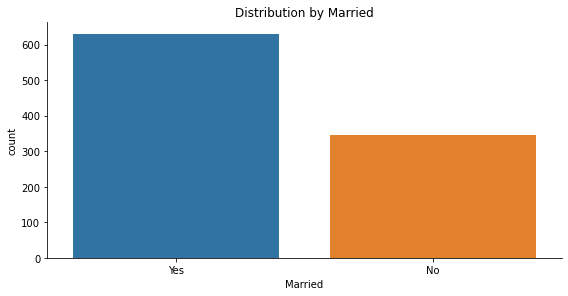

In [23]:
### Married

sns.catplot(x = "Married", kind="count", data = df,height=4, aspect=2,order = df['Married'].value_counts(ascending=False).index ).set(title ='Distribution by Married')

In [24]:
###How do the the Dependents compare? i.e. what is the distrubition of each?
df['Dependents'].value_counts()

0     545
1     160
2     160
3+     91
Name: Dependents, dtype: int64

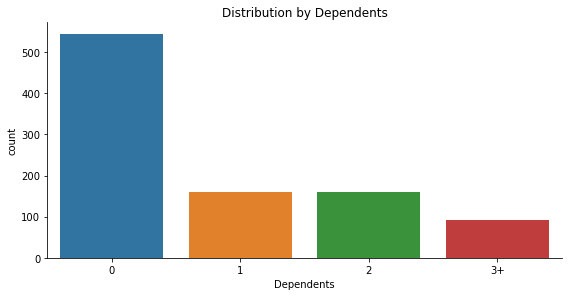

In [25]:
### Dependents

sns.catplot(x = "Dependents", kind="count", data = df,height=4, aspect=2,order = df['Dependents'].value_counts(ascending=False).index ).set(title ='Distribution by Dependents')

In [26]:
###How do the the Education compare? i.e. what is the distrubition of each?
df['Education'].value_counts()

Graduate        763
Not Graduate    218
Name: Education, dtype: int64

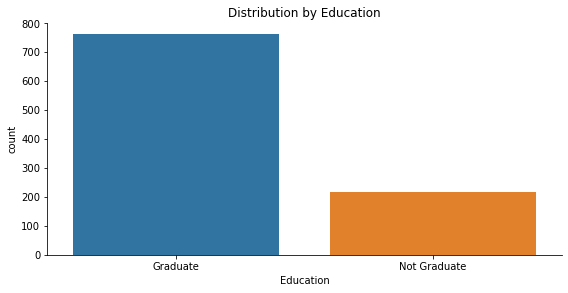

In [27]:
## Education

sns.catplot(x = "Education", kind="count", data = df,height=4, aspect=2,order = df['Education'].value_counts(ascending=False).index ).set(title ='Distribution by Education')

In [28]:
###How do the the Self_Employed compare? i.e. what is the distrubition of each?
df['Self_Employed'].value_counts()

No     807
Yes    119
Name: Self_Employed, dtype: int64

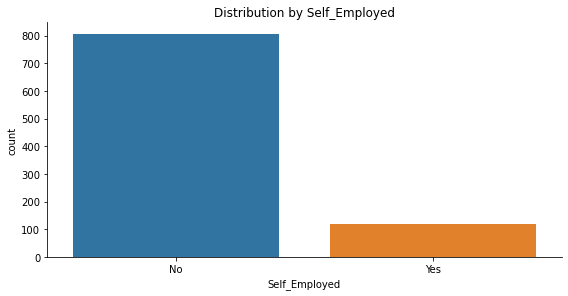

In [29]:
## Self_Employed

sns.catplot(x = "Self_Employed", kind="count", data = df,height=4, aspect=2,order = df['Self_Employed'].value_counts(ascending=False).index ).set(title ='Distribution by Self_Employed')

In [30]:
###How do the the Property_Area compare? i.e. what is the distrubition of each?
df['Property_Area'].value_counts()

Semiurban    349
Urban        342
Rural        290
Name: Property_Area, dtype: int64

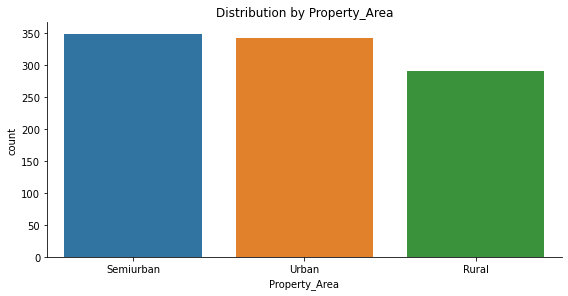

In [31]:
## Property_Area

sns.catplot(x = "Property_Area", kind="count", data = df,height=4, aspect=2,order = df['Property_Area'].value_counts(ascending=False).index ).set(title ='Distribution by Property_Area')

In [32]:
###How do the the Loan_Status compare? i.e. what is the distrubition of each?
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

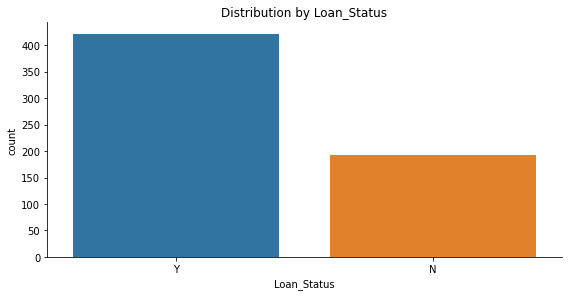

In [33]:
## Loan_Status

sns.catplot(x = "Loan_Status", kind="count", data = df,height=4, aspect=2,order = df['Loan_Status'].value_counts(ascending=False).index ).set(title ='Distribution by Loan_Status')

Text(0.5, 1.0, 'Distribution by Loan_Status')

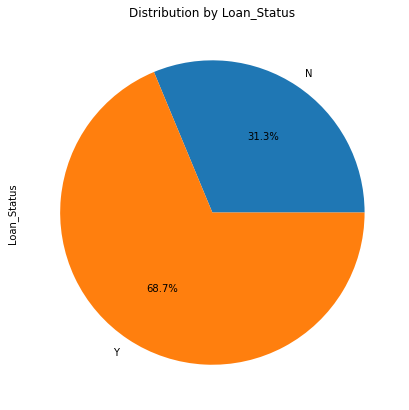

In [34]:
## Loan_Status showing the percentage

df.groupby("Loan_Status")["Loan_Status"].count().plot.pie(autopct="%.1f%%",figsize=(7,7)).set_title('Distribution by Loan_Status')

In [35]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


<AxesSubplot:ylabel='ApplicantIncome'>

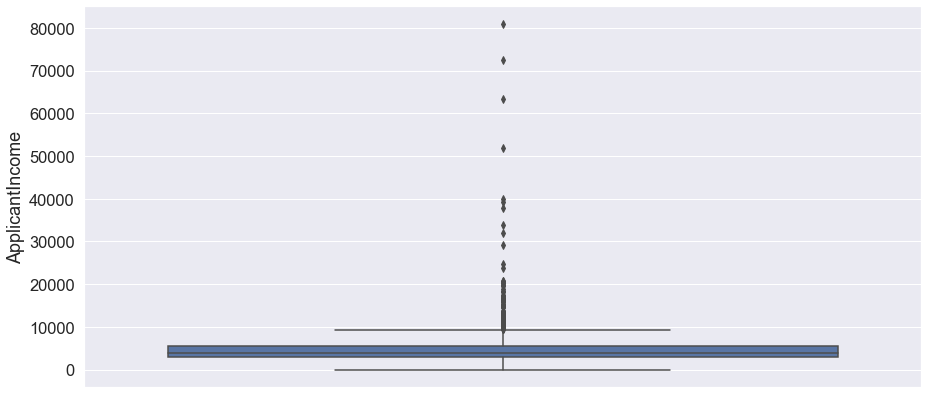

In [36]:
## ApplicantIncome range 

#Revenue By Exit Rate

sns.set_theme(font_scale=1.5)
plt.figure(figsize=(15,7))

sns.boxplot(y=df.ApplicantIncome)


## Bivariable Analysis

In [37]:
## How do women and men compare when it comes to defaulting on loans in the historical dataset?
df.groupby('Gender')['Loan_Status'].value_counts()

Gender  Loan_Status
Female  Y               75
        N               37
Male    Y              339
        N              150
Name: Loan_Status, dtype: int64

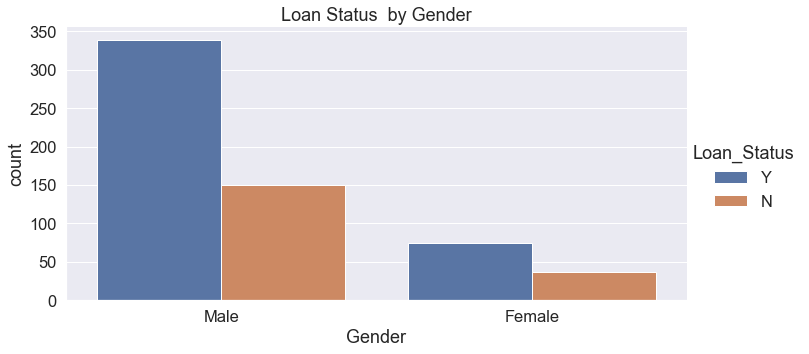

In [38]:
## visuals of how do women and men compare when it comes to defaulting on loans in the historical dataset?

sns.catplot(x='Gender',data=df,hue='Loan_Status',kind='count',aspect=2, order = dt['Gender'].value_counts(ascending=False).index).set(title ='Loan Status  by Gender')

In [39]:
## How many of the loan applicants have dependents based on the historical dataset?

df.groupby('Dependents')['Loan_Status'].value_counts()

Dependents  Loan_Status
0           Y              238
            N              107
1           Y               66
            N               36
2           Y               76
            N               25
3+          Y               33
            N               18
Name: Loan_Status, dtype: int64

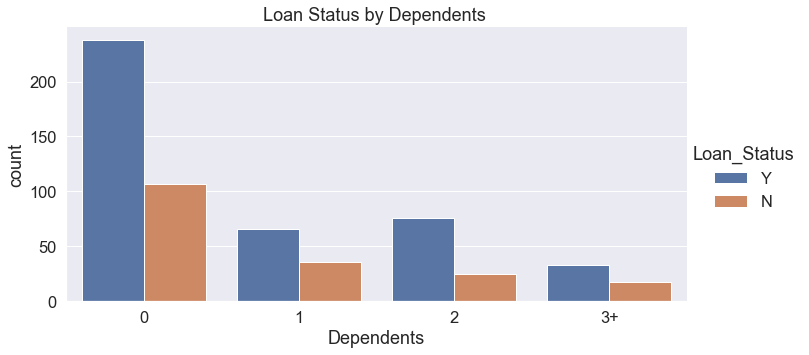

In [40]:
## visual of how many of the loan applicants have dependents based on the historical dataset?
sns.catplot(x='Dependents',data=df,hue='Loan_Status',kind='count',aspect=2, order = dt['Dependents'].value_counts(ascending=False).index).set(title ='Loan Status by Dependents ')

In [41]:
## How do the incomes of those who are employed compare to those who are self employed based on the historical dataset?
df.groupby('Self_Employed')['ApplicantIncome'].describe()

,count,mean,std,min,25%,50%,75%,max
Self_Employed,,,,,,,,
No,807.0,4892.030979,5406.791993,0.0,2861.5,3708.0,5000.0,81000.0
Yes,119.0,6912.579832,5727.299872,570.0,3333.0,5503.0,8312.0,39147.0


[Text(0.5, 1.0, 'ApplicantIncome By Self_Employed')]

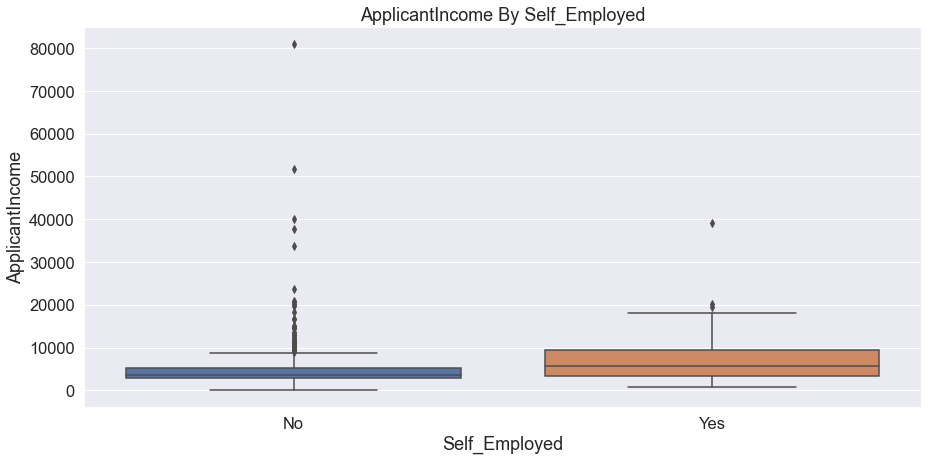

In [42]:
## visuals of how do the incomes of those who are employed compare to those who are self employed based on the historical dataset??

sns.set_theme(font_scale=1.5)
plt.figure(figsize=(15,7))

sns.boxplot(x='Self_Employed', y='ApplicantIncome', data=dt).set(title='ApplicantIncome By Self_Employed')

## Are applicants with a credit history more likely to default than those who do not have one?

In [43]:
##Are applicants with a credit history more likely to default than those who do not have one?
df.groupby('Credit_History')['Loan_Status'].value_counts()

Credit_History  Loan_Status
0.0             N               82
                Y                7
1.0             Y              378
                N               97
Name: Loan_Status, dtype: int64

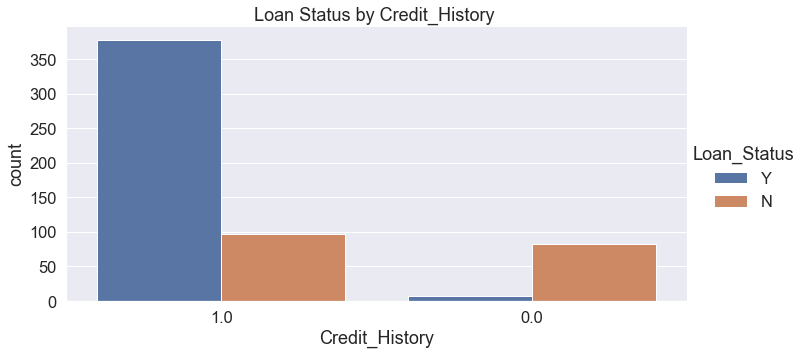

In [44]:
##visuals Are applicants with a credit history more likely to default than those who do not have one?

sns.catplot(x='Credit_History',data=df,hue='Loan_Status',kind='count',aspect=2, order = dt['Credit_History'].value_counts(ascending=False).index).set(title ='Loan Status by Credit_History ')

## Is there a correlation between the applicant's income and the loan amount they applied for?

<AxesSubplot:>

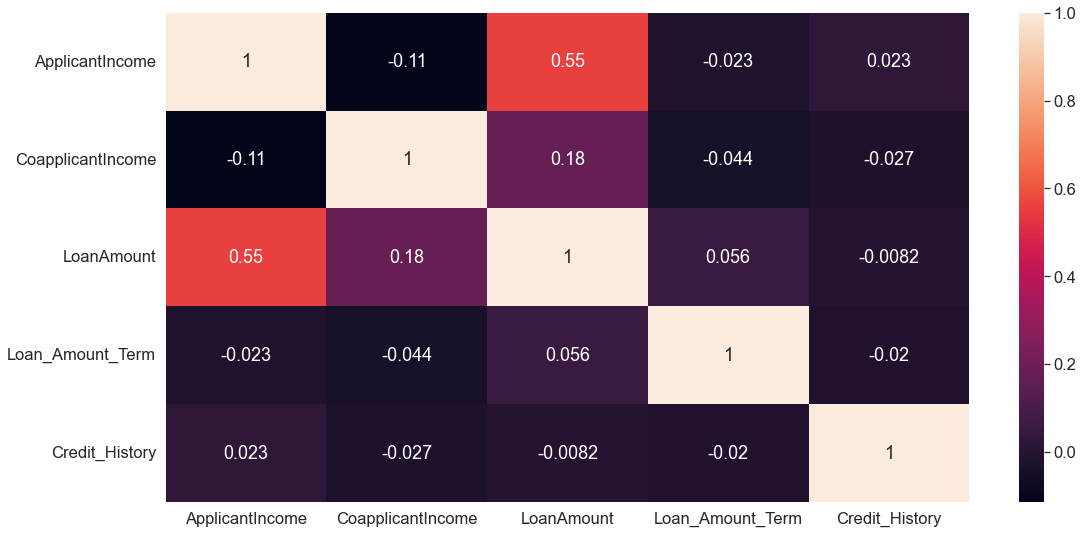

In [45]:
plt.figure(figsize=(18,9))

sns.heatmap(df.corr(),annot=True)

## Clean dataset


Handling missing values

In [46]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [47]:
## checking missing values

df.isnull().sum().sort_values(ascending=False)

Loan_Status          367
Credit_History        79
Self_Employed         55
LoanAmount            27
Dependents            25
Gender                24
Loan_Amount_Term      20
Married                3
Loan_ID                0
Education              0
ApplicantIncome        0
CoapplicantIncome      0
Property_Area          0
dtype: int64

In [48]:
# separate the numerical columns from the categorical


df_numerical = df.select_dtypes(exclude='object')
df_categorical = df.select_dtypes(include='object')

In [49]:
df_numerical.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


In [50]:
# num_data
# fill every missing value with mean value in the same column

df_numerical.fillna(df_numerical.median(numeric_only=True).round(1), inplace=True)


df_numerical.isnull().sum().any() # check for more missing data 

False

In [51]:
df_numerical.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,126.0,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


In [52]:
# If you want to fill every column with its own most frequent value you can use

df_categorical = df_categorical.apply(lambda x:x.fillna(x.value_counts().index[0]))
df_categorical.isnull().sum().any() # check for more missing data 

False

In [53]:
df_categorical.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [54]:
df=pd.concat([df_categorical,df_numerical],axis=1)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,LP001002,Male,No,0,Graduate,No,Urban,Y,5849,0.0,126.0,360.0,1.0
1,LP001003,Male,Yes,1,Graduate,No,Rural,N,4583,1508.0,128.0,360.0,1.0
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y,3000,0.0,66.0,360.0,1.0
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y,2583,2358.0,120.0,360.0,1.0
4,LP001008,Male,No,0,Graduate,No,Urban,Y,6000,0.0,141.0,360.0,1.0


# Part Two

In [55]:
  #importing libraries
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.tree import ExtraTreeClassifier


In [56]:
## cleaned dataset
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,LP001002,Male,No,0,Graduate,No,Urban,Y,5849,0.0,126.0,360.0,1.0
1,LP001003,Male,Yes,1,Graduate,No,Rural,N,4583,1508.0,128.0,360.0,1.0
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y,3000,0.0,66.0,360.0,1.0
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y,2583,2358.0,120.0,360.0,1.0
4,LP001008,Male,No,0,Graduate,No,Urban,Y,6000,0.0,141.0,360.0,1.0


In [57]:
### Include Numerical Features Here ###

df_numerical.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,126.0,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


In [58]:
### Include Categorical Features Here ###
df_categorical.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [59]:
#remove the columns not needed from the categorical column, and the column(Loan_Status) which is needed to test and train the dataset

df_categorical = df_categorical.drop(['Loan_ID', 'Property_Area','Loan_Status'],axis=1)
df_categorical.head()

,Gender,Married,Dependents,Education,Self_Employed
0,Male,No,0,Graduate,No
1,Male,Yes,1,Graduate,No
2,Male,Yes,0,Graduate,Yes
3,Male,Yes,0,Not Graduate,No
4,Male,No,0,Graduate,No


In [60]:
#select categorical variables

#use pd.get_dummies() for one hot encoding

df_dummies = pd.get_dummies(df_categorical)

#view what you have done
df_dummies.head()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes
0,0,1,1,0,1,0,0,0,1,0,1,0
1,0,1,0,1,0,1,0,0,1,0,1,0
2,0,1,0,1,1,0,0,0,1,0,0,1
3,0,1,0,1,1,0,0,0,0,1,1,0
4,0,1,1,0,1,0,0,0,1,0,1,0


In [61]:
# join the encoded categorial column to the numerical column using pd.concat()
X=pd.concat([df_numerical,df_dummies],axis=1)
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes
0,5849,0.0,126.0,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0
1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0
2,3000,0.0,66.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,0,1,0,1,1,0,0,0,0,1,1,0
4,6000,0.0,141.0,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0


In [62]:
# label encode target

y=df['Loan_Status']

y = df['Loan_Status'].map({'N':0,'Y':1}).astype(int)
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int32

## TRAIN THE DATA

In [63]:
# # train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('\n',X_train.head(2))
print('\n',X_test.head(2))
print('\n',y_train.head(2))
print('\n',y_test.head(2))


      ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
361             2269             2167.0        99.0             360.0   
11              2185             1516.0       162.0             360.0   

     Credit_History  Gender_Female  Gender_Male  Married_No  Married_Yes  \
361             1.0              0            1           0            1   
11              1.0              0            1           0            1   

     Dependents_0  Dependents_1  Dependents_2  Dependents_3+  \
361             0             1             0              0   
11              0             1             0              0   

     Education_Graduate  Education_Not Graduate  Self_Employed_No  \
361                   1                       0                 1   
11                    1                       0                 1   

     Self_Employed_Yes  
361                  0  
11                   0  

      ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  

In [64]:
#initiate the models
LR = LogisticRegression(random_state=42)
KN = KNeighborsClassifier()
DC = DecisionTreeClassifier(max_depth=1, random_state=42)
RC= RandomForestClassifier(random_state=42)
EC = ExtraTreeClassifier(random_state=0)
RF = RandomForestClassifier(random_state=42)

In [65]:
#create list of your model names
models = [LR,KN,DC,RC,EC,RF]

In [66]:
#create function to train a model and evaluate accuracy
def trainer(models,X_train,y_train,X_test,y_test):
    #fit your model
    models.fit(X_train,y_train)
    #predict on the fitted model
    prediction = models.predict(X_test)
    #print evaluation metric
    print('\nFor {}, Accuracy score is {} \n'.format(models.__class__.__name__,accuracy_score(prediction,y_test)))
    print(classification_report(prediction,y_test))

In [67]:
#loop through each model, training in the process
for model in models:
    trainer(model,X_train,y_train,X_test,y_test)


For LogisticRegression, Accuracy score is 0.8020304568527918 

              precision    recall  f1-score   support

           0       0.17      0.64      0.26        11
           1       0.97      0.81      0.89       186

    accuracy                           0.80       197
   macro avg       0.57      0.72      0.57       197
weighted avg       0.93      0.80      0.85       197


For KNeighborsClassifier, Accuracy score is 0.7868020304568528 

              precision    recall  f1-score   support

           0       0.12      0.50      0.19        10
           1       0.97      0.80      0.88       187

    accuracy                           0.79       197
   macro avg       0.54      0.65      0.53       197
weighted avg       0.92      0.79      0.84       197


For DecisionTreeClassifier, Accuracy score is 0.817258883248731 

              precision    recall  f1-score   support

           0       0.38      0.62      0.47        26
           1       0.94      0.85      0

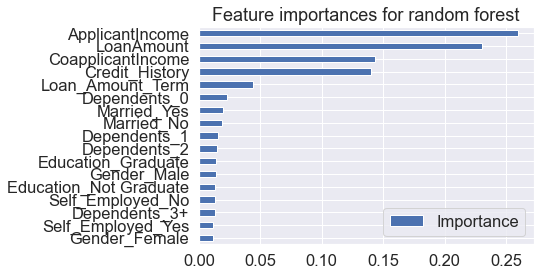

In [68]:
#get feature importances
RF_importances = pd.DataFrame(data = RF.feature_importances_,index = X_test.columns, columns=['Importance'])

#plot top feature importances, sorted
RF_importances[::].sort_values(by='Importance').plot.barh()

plt.title('Feature importances for random forest')
plt.show()